# Clustering Techniques

Clustering is the process of examining a collection of “points,” and grouping the points into “clusters” according to some distance measure.
The goal is that points in the same cluster have a small distance from one another, while points in different clusters are at a large distance from one another. 

There are two main approaches to clustering: 
- point-based,
- hierarchical

A dataset, that is suitable for clustering is a collection of points, which are objects belonging to some space.

All spaces for which we can perform a clustering have a distance measure, giving a distance between any two points in the space. 

An example is the Euclidean space, where points are vectors of real numbers and the length of the vector is the number of dimensions of that space. The components of the vector are commonly called coordinates of the represented points. The common Euclidean distance (square root of the sums of the squares of the differences between the coordinates of the points in each dimension) serves for all Euclidean spaces (some other are  the Manhattan distance).

There are also other distance measures for non-Euclidean spaces. These include the Jaccard distance, cosine distance, Hamming distance, edit distance.

The requirements for a function on pairs of points to be a distance measure are:
- 1. Distances are always nonnegative, and only the distance between a point and itself is 0.
- 2. Distance is symmetric; it doesn’t matter in which order you consider the points when computing their distance.
- 3. Distance measures obey the triangle inequality; the distance from x to y to z is never less than the distance going from x to z directly.

## 1. Clustering strategies

Clustering algorithms can be divided into two groups based on their strategies:
- 1. Hierarchical or agglomerative algorithms start with each point in its own cluster. Clusters are combined based on their “closeness,” using one of many possible definitions of “close.” 
- 2. The other class of algorithms involve point assignment. Points are considered in some order, and each one is assigned to the cluster into which it best fits. This process is normally preceded by a short phase in which initial clusters are estimated.

## 2. Hierarchical Clustering

### 2.1 Hierarchical Clustering in a Euclidean Space

We begin with every point in its own cluster. As time goes on, larger clusters will be constructed by combining two smaller clusters, and we have to decide in advance:
1. How will clusters be represented?
2. How will we choose which two clusters to merge? 
3. When will we stop combining clusters?


__Algorithm__:

WHILE it is not time to stop DO

    pick the best two clusters to merge; combine those two clusters into one cluster;
  
END;

We can represent a cluster by its centroid or average of the points in the cluster.

We can then use the merging rule that the distance between any two clusters is the Euclidean distance between their centroids, and we should pick the two clusters at the shortest distance.

There are several approaches we might use to stopping the clustering process:
1. We could be told, or have a belief, about how many clusters there are in the data, then we know to stop when there are as many clusters left as we wanted.
2. We could stop combining when at some point the best combination of existing clusters produces a cluster that is inadequate.(example: any cluster have an average distance between the centroid and its points no greater than some limit)
3. We could continue clustering until there is only one cluster and we return the tree representing the way in which all the points were combined(dendogram).

This algorithm cannot be run except for fairly small numbers of points, because the complexity is $O(n^3)$.

But there is a more efficient implementation of which we should be aware which gives complexity of $O(n^2logn)$


In [1]:
%matplotlib inline

Using hierarchical clustering (AgglomerativeClustering algorithm) in Scikit

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

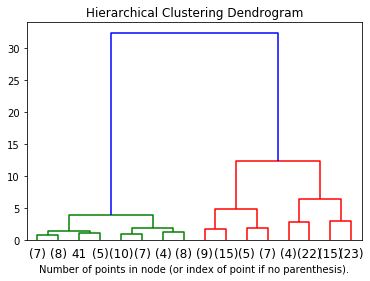

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

(-15, 15)

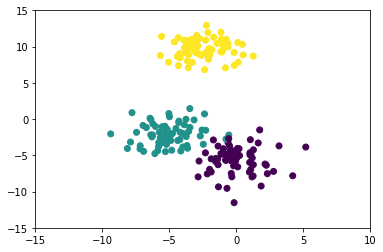

In [3]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,10)
plt.ylim(-15,15)

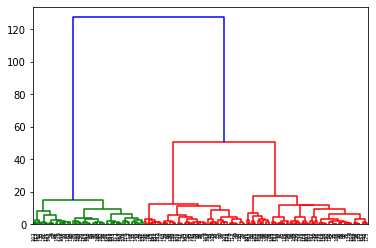

In [4]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
clf = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# save clusters for chart
y_hc = clf.fit_predict(points)

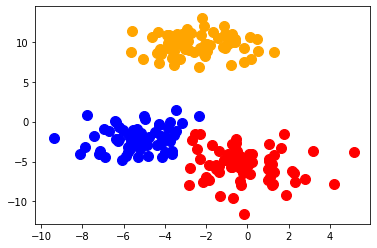

In [5]:
plt.scatter(points[y_hc == 0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc == 1,0], points[y_hc == 1,1], s=100, c='orange')
plt.scatter(points[y_hc == 2,0], points[y_hc == 2,1], s=100, c='blue')
plt.show()

## 3. K-Means Algorithm

This is a point-assignment algorithm.
K-means assume a Euclidean space, and also assume the number of clusters, k, is known in advance.(it is possible to deduce k by trial and error)

__Algorithm__:

Initially choose k points that are likely to be in different clusters;

Make these points the centroids of their clusters; 

FOR each remaining point p DO

    find the centroid to which p is closest;
    Add p to the cluster of that centroid;
    Adjust the centroid of that cluster to account for p;
    
END;

### Initializing Clusters for K-Means:

There are two approaches.
1. Pick points that are as far away from one another as possible.
2. Cluster a sample of the data, perhaps hierarchically, so there are k clusters. Pick a point from each cluster, perhaps that point closest to the centroid of the cluster.

Possible solution for the first approach:

__Algorithm__:

Pick the first point at random;

WHILE there are fewer than k points DO

    Add the point whose minimum distance from the selected points is as large as possible; 
    
END;

### Picking the Right Value of k

If we can measure the quality of the clustering for various values of k, we can usually guess what the right value of k is. We can find a good value in a number of clustering operations that grows only logarithmically with the true number. 

Begin by running the k-means algorithm for k = 1,2,4,8,... . Eventually, we will find two values v and 2v between which there is very little decrease in the average diameter, or whatever measure of cluster cohesion we are using. We may conclude that the value of k that is justified by the data lies between v/2 and v.

Using K-Means in Scikit

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(points)

[[-5.17095009 -2.07739109]
 [-2.43247424  9.68894613]
 [ 0.02908795 -5.54484552]]


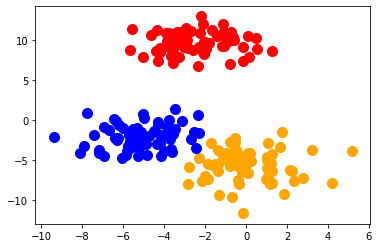

In [7]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='orange')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.show()

# Summary

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

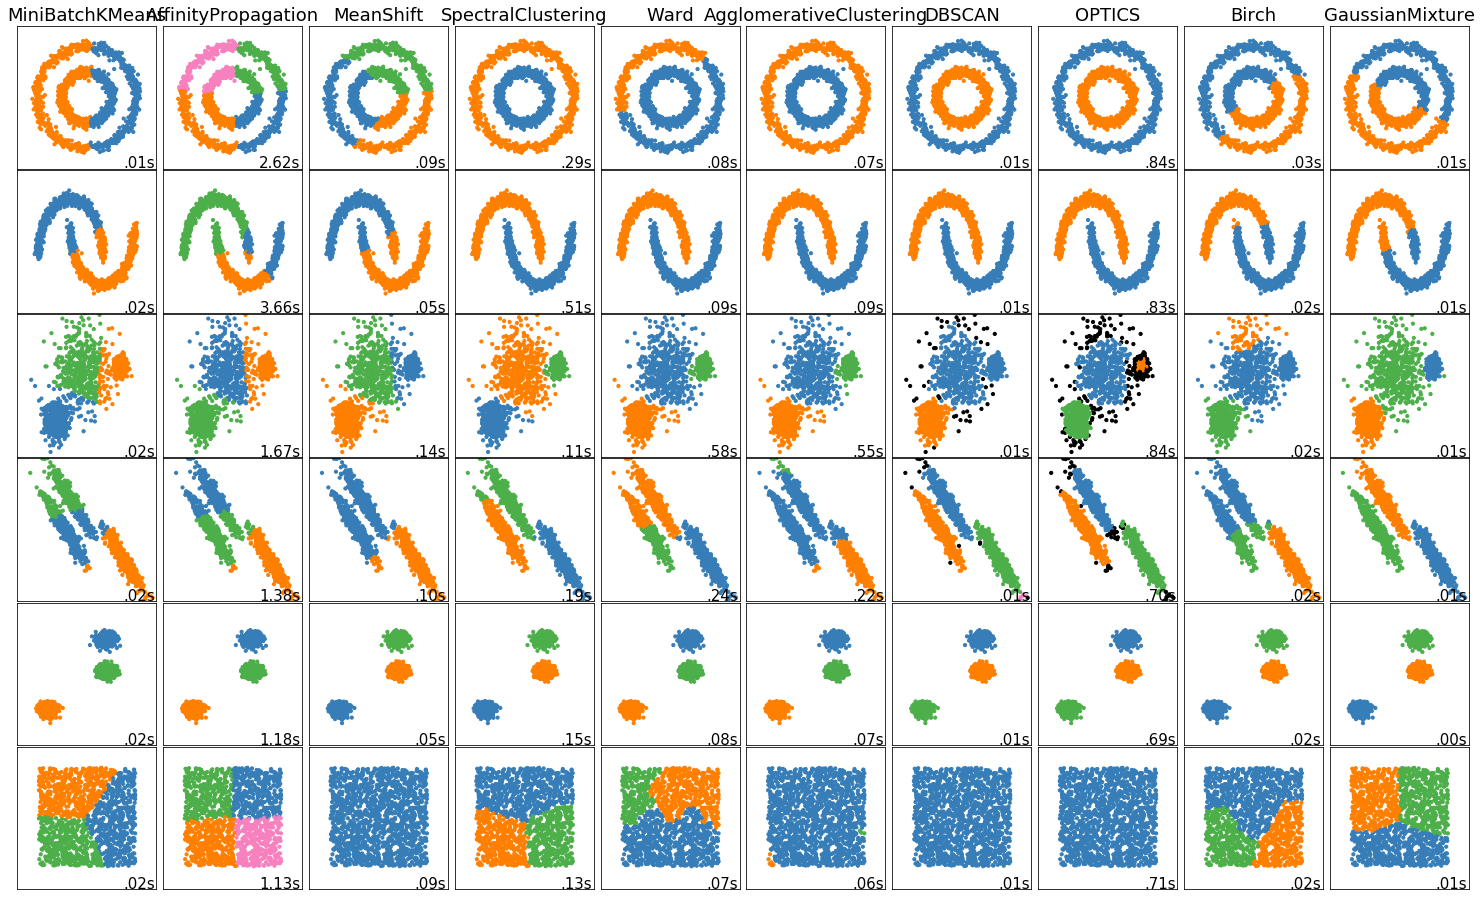

In [8]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

There are also other clustering algorithms better suited for processing big data sets.
An example of them is the CURE (Clustering Using REpresentatives) algorithm and The Algorithm of Bradley, Fayyad, and Reina.

The BFR Algorithm is a version of k-means designed to handle data that is too large to fit in main memory. It assumes clusters are normally distributed about the axes.

The CURE Algorithm is of the point-assignment type. It is designed for a Euclidean space, but clusters can have any shape. It handles data that is too large to fit in main memory.